In [11]:
import sys
sys.version

'2.7.15 | packaged by conda-forge | (default, Jul  2 2019, 00:39:44) \n[GCC 7.3.0]'

In [1]:
import cmpy
cmpy

<module 'cmpy' from '/srv/conda/envs/kernel/lib/python2.7/site-packages/cmpy/__init__.pyc'>

In [4]:
cmpy.cmpyParams

{'atol': 1.000000000000001e-12,
 'block_entropy_method': 'msp',
 'include_forbidden': True,
 'logs': True,
 'probability_method': 'array',
 'rtol': 1.000000000000001e-10,
 'show': 'external',
 'sparse': True,
 'text.font': 'ascii',
 'text.usetex': False,
 'transducers.error': 0,
 'use_logs': True}

In [10]:
m = cmpy.machines.Even()

AttributeError: can't set attribute

In [5]:
import dit
dit.__version__

'1.2.3'

In [6]:
import numpy as np
np.__version__

'1.16.5'

In [14]:
import pygraphviz
pygraphviz.__version__

'1.5'

In [15]:
import openmdao
openmdao.__version__

'2.9.1'

In [16]:
import openmdao.api as om

# build the model
prob = om.Problem()
indeps = prob.model.add_subsystem('indeps', om.IndepVarComp())
indeps.add_output('x', 3.0)
indeps.add_output('y', -4.0)

prob.model.add_subsystem('paraboloid', om.ExecComp('f = (x-3)**2 + x*y + (y+4)**2 - 3'))

prob.model.connect('indeps.x', 'paraboloid.x')
prob.model.connect('indeps.y', 'paraboloid.y')

# setup the optimization
prob.driver = om.ScipyOptimizeDriver()
prob.driver.options['optimizer'] = 'SLSQP'

prob.model.add_design_var('indeps.x', lower=-50, upper=50)
prob.model.add_design_var('indeps.y', lower=-50, upper=50)
prob.model.add_objective('paraboloid.f')

prob.setup()
prob.run_driver()

Unable to import mpi4py. Parallel processing unavailable.


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -27.3333333333
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
Optimization Complete
-----------------------------------


False

In [18]:
print(prob.list_problem_vars())

----------------
Design Variables
----------------
name      value          size  
--------  -------------  ---- 
indeps.x  [6.66666667]   1     
indeps.y  [-7.33333333]  1     

-----------
Constraints
-----------
name  value  size  
----  -----  ---- 

----------
Objectives
----------
name          value           size  
------------  --------------  ---- 
paraboloid.f  [-27.33333333]  1     

None


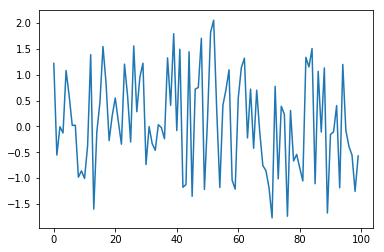

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.random.randn(100))